In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 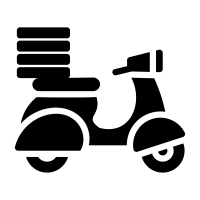Open the CSV files using pandas

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df=pd.read_csv('/content/drive/My Drive/Colab_Notebooks/MachineLearning/StrokeDetection/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

### Check the null values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Verify the how many unique values are present for BMI

In [ ]:
df['bmi'].nunique()

418

### get the mode because this field represents the info about body mass so it can't be the mean or median

In [ ]:
df['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [ ]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace=True)

In [ ]:
df['bmi'].isnull().sum()

0

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### ID column not required for this dataset

In [21]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### As per above info we need to convert the datatype of age into int

In [ ]:
df['age'].dtype

dtype('float64')

In [ ]:
df['age'] = df['age'].astype('int')

In [ ]:
df['age'].dtype

dtype('int64')

### Check the numerical relationship of the all the int data types

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.885636,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.698109,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### check the unique values

In [ ]:
df.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### Check the Outliers present or not

<Axes: ylabel='bmi'>

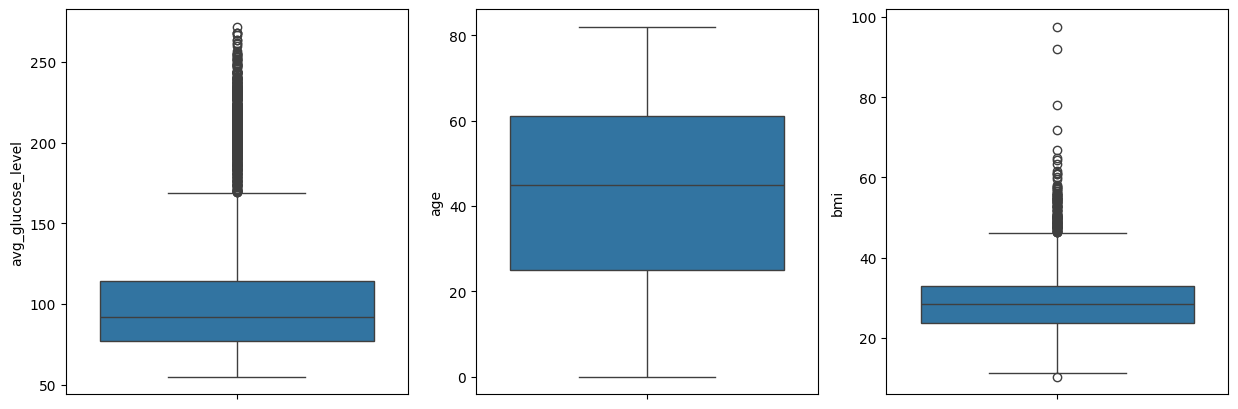

In [ ]:
fig, ax =plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(df['avg_glucose_level'],ax=ax[0])
sns.boxplot(df['age'],ax=ax[1])
sns.boxplot(df['bmi'],ax=ax[2])
#plt.legend()

### From Above box plot we can say that the bmi and glucose lvl doesn't have outliers bcoz a person can have high mass weight and glucose

### Lets change the category values into numericl values

In [ ]:
df.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['gender'].replace({'Male':1,'Female':0,'Other':1},inplace=True)

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1


In [ ]:
df.tail(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5108,1,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,0,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df_copy=df.copy

In [23]:
import copy
df_copy = copy.deepcopy(df)

In [ ]:
print(type(df_copy))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df['Residence_type']=le.fit_transform(df['Residence_type'])

### Below snippet is to reverse the encoding format

In [ ]:
df['smoking_status']=le.inverse_transform(df['smoking_status'])

ValueError: y contains previously unseen labels: ['Unknown' 'formerly smoked' 'never smoked' 'smokes']

### convert the smoking data into encoding

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [ ]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [ ]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0,1,228.69,36.6,1,1
1,0,61,0,0,1,1,0,202.21,28.7,2,1


### Find the corr between all of them

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414090,43.215264,0.097456,0.054012,0.656164,0.832094,0.508023,106.147677,28.885636,1.376908,0.048728
std,0.492612,22.633866,0.296607,0.226063,0.475034,1.109924,0.499985,45.283560,7.698109,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


<Axes: >

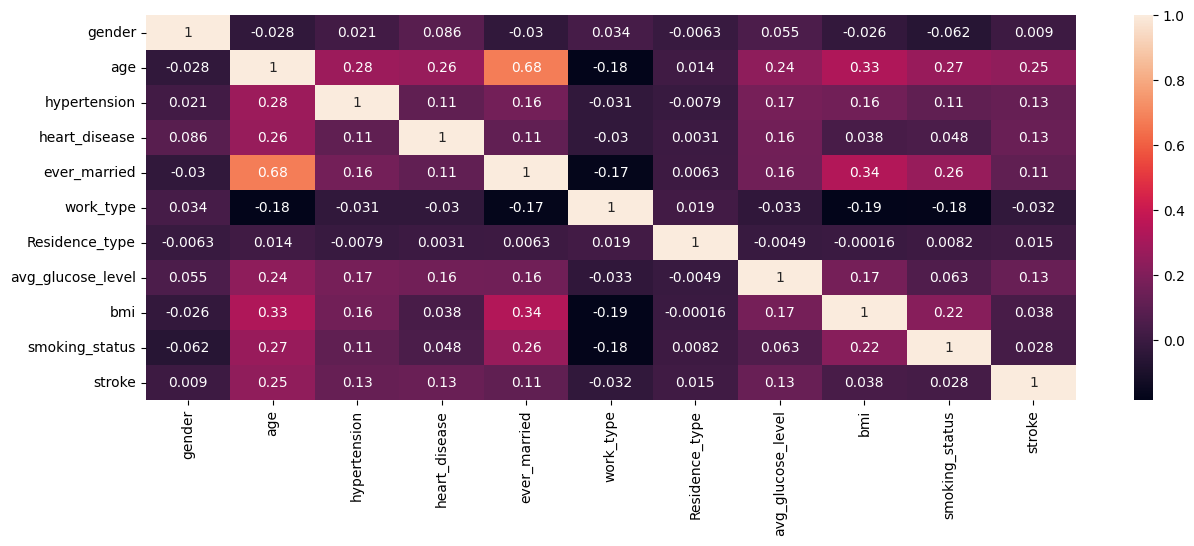

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

## **EDA:**

#### Stroke with age

<Axes: xlabel='age', ylabel='Count'>

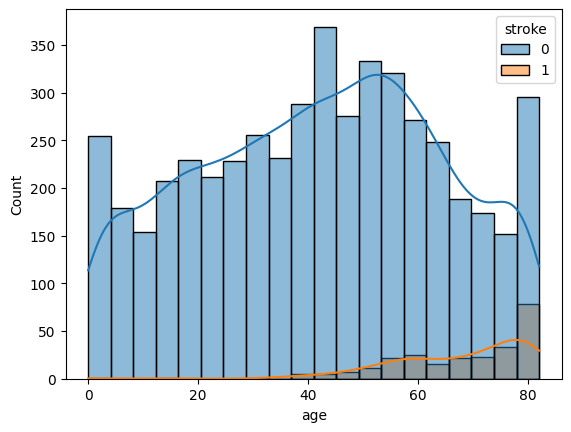

In [ ]:
sns.histplot(x=df['age'],hue=df['stroke'],kde=True)

In [ ]:
# prompt: create bins using age columns

# bins = [0,10, 20, 30, 40, 50, 60, 70, 80]
# labels = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
# df['age_group'] = pd.cut(df['age'], bins, labels=labels)
# df.drop('age_group',axis=1,inplace=True)

In [ ]:
df['age'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
df['age'].count()

5110

In [ ]:
df['age'] =pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df['age'].shape
df.iloc[0:2, :50]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,NaN,0,1,1,0,1,228.69,36.6,1,1
1,0,NaN,0,0,1,1,0,202.21,28.7,2,1


### gender with strokes

<Axes: xlabel='gender', ylabel='count'>

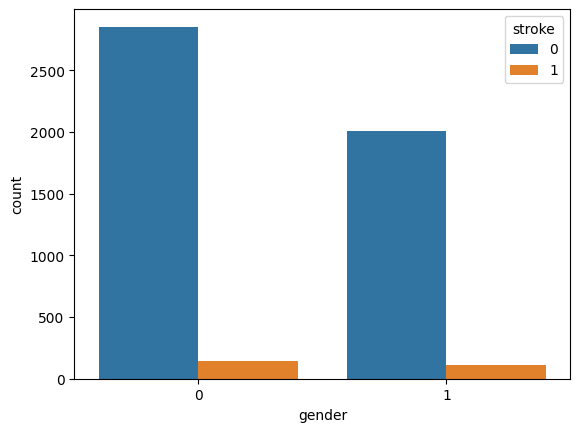

In [ ]:
sns.countplot(data=df,x='gender',hue='stroke')

<Axes: xlabel='Residence_type', ylabel='count'>

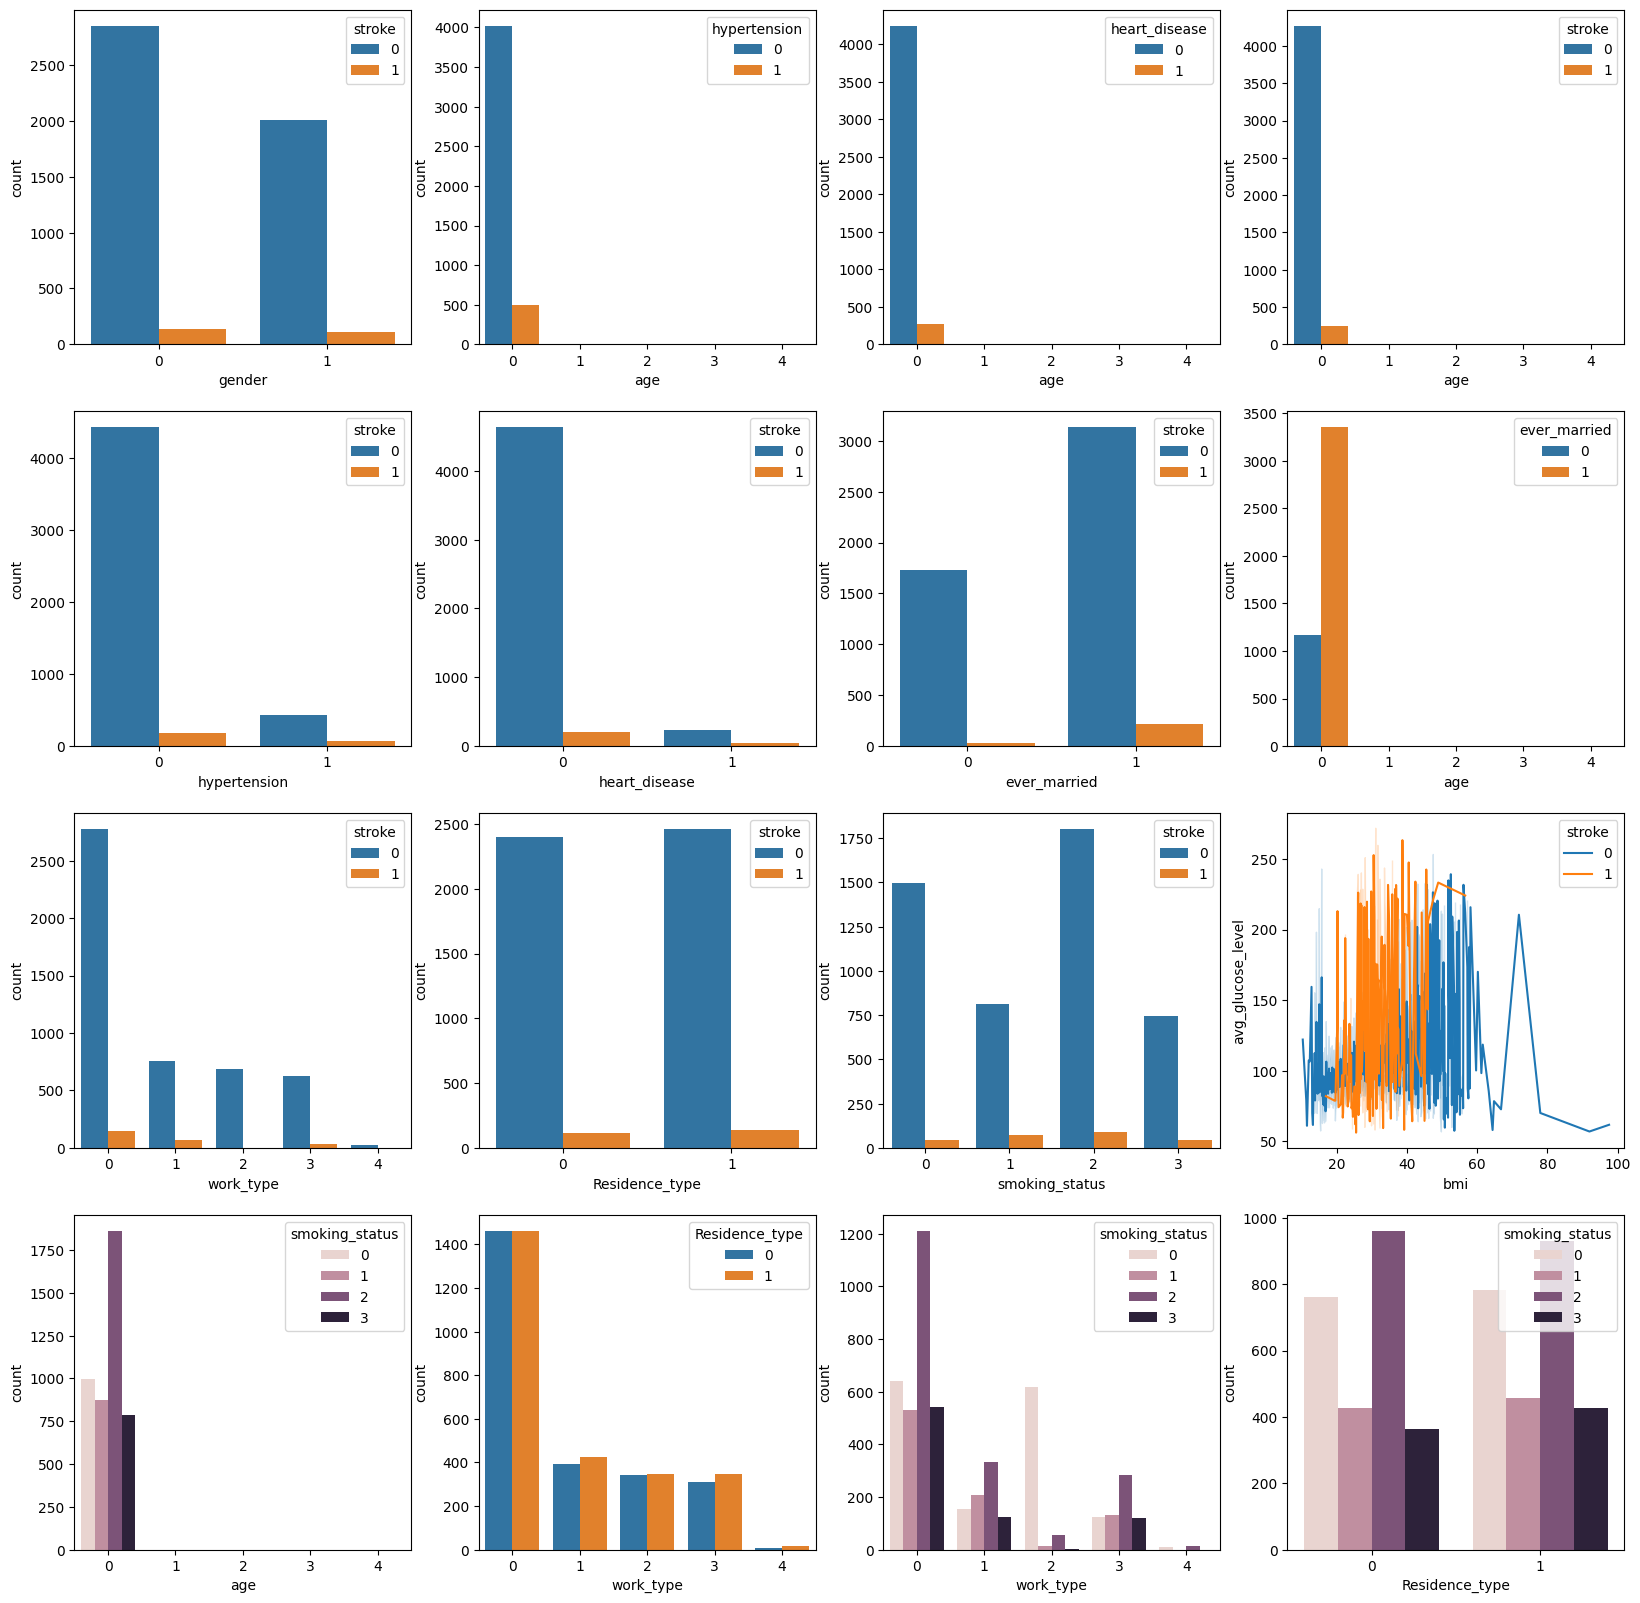

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

### Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [24]:
X=df_copy.drop(columns=['stroke'])
X.shape

(5110, 10)

In [27]:
y=df_copy['stroke']
y.shape

(5110,)

In [28]:
X_train,X_test,y_traain,y_test=train_test_split(X,y,random_state=30,test_size=0.25)

### Train the model

#### Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty= 'l1', solver= 'liblinear')

In [10]:
Param={
    'penalty':['l1', 'l2', 'elasticnet'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [11]:
from sklearn.model_selection import GridSearchCV
lr_gdr = GridSearchCV(LR,param_grid=Param)

In [29]:
lr_gdr.fit(X_train,y_traain)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Female'

--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Male'

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cholesky supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cholesky supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.


In [ ]:
LR.fit(X_train,y_traain)

ValueError: could not convert string to float: 'No'

In [ ]:
df_copy.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1


In [ ]:
cols=['ever_married','work_type','Residence_type','smoking_status']
df_copy[cols]=le.fit_transform(cols)

In [ ]:
df_copy.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,0,228.69,36.6,2,1
1,0,61,0,0,1,3,0,202.21,28.7,2,1


#### standardize the glucose and bmi

In [31]:
from sklearn.preprocessing import StandardScaler
standardization= StandardScaler()

In [33]:
standardization.fit_transform(df_copy[['avg_glucose_level','bmi']])

array([[ 2.70637544,  0.98134488],
       [ 2.12155854,         nan],
       [-0.0050283 ,  0.45926914],
       ...,
       [-0.51144264,  0.21733161],
       [ 1.32825706, -0.41934612],
       [-0.46086746, -0.34294479]])

In [34]:
df_copy.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
LR_Train=LR.fit(X_train,y_traain)

In [ ]:
lr_gdr.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [ ]:
LR_predict=LR.predict(X_test)

In [ ]:
lr_predict=accuracy_score(LR_predict,y_test)

In [ ]:
table_lr=pd.DataFrame({
    'Actual':y_test,
    'Predicted':LR_predict
})

In [ ]:
table_lr

,Actual,Predicted
67,1,0
2931,0,0
3550,0,0
4799,0,0
57,1,0
...,...,...
5003,0,0
2265,0,0
1907,0,0
1488,0,0


In [ ]:
#### Actual Accuracy
lr_actual=LR.score(X_train,y_traain)
lr_actual

0.9483298538622129

In [ ]:
result=pd.DataFrame(columns=['model','actual','predict'])

In [ ]:
result=result.append({'model':'Logistic regression','actual':lr_actual,'predict':lr_predict},ignore_index=True)

<ipython-input-407-5c6272d79336>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Logistic regression','actual':lr_actual,'predict':lr_predict},ignore_index=True)


In [ ]:
result

,model,actual,predict
1,Logistic regression,0.94833,0.960094


In [ ]:
result=result.drop([0])

In [ ]:
from sklearn.metrics import confusion_matrix

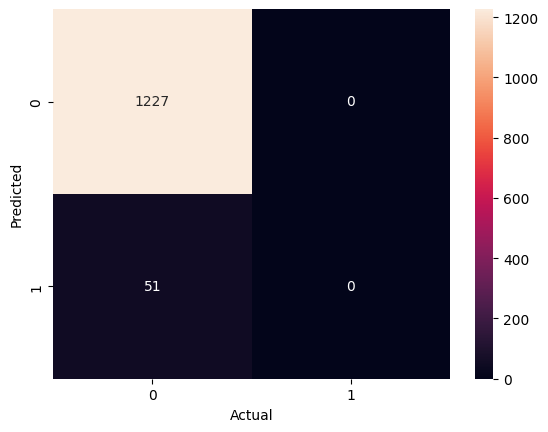

In [ ]:
sns.heatmap(confusion_matrix(y_test,LR_predict),annot=True,fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

### Lets Go with Decission tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(criterion= 'log_loss', max_depth= 5, splitter= 'random')

In [ ]:
dtrParam=({
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[5,10,15],
})

In [ ]:
dtr_gdr=GridSearchCV(dtr,param_grid=dtrParam,cv=5)

In [ ]:
dtr_gdr.fit(X_train,y_traain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'splitter': ['best', 'random']})

In [ ]:
dtr_gdr.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'random'}

In [ ]:
dtr.fit(X_train,y_traain)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random')

In [ ]:
dtr_train_acc=dtr.score(X_train,y_traain)

In [ ]:
dtr_train_acc

0.9485908141962421

In [ ]:
dtr_pred=dtr.predict(X_test)

In [ ]:
dtr_test_acc=accuracy_score(y_test,dtr_pred)
dtr_test_acc

0.960093896713615

In [ ]:
result=result.append({'model':'DecisionTree','actual':dtr_train_acc,'predict':dtr_test_acc},ignore_index=True)

<ipython-input-434-7caf99741ac8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'DecisionTree','actual':dtr_train_acc,'predict':dtr_test_acc},ignore_index=True)


In [ ]:
result

,model,actual,predict
0,Logistic regression,0.948330,0.960094
1,DecisionTree,0.948591,0.960094


### Lets go with RandomForeest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 5)

In [ ]:
rfc_param=({
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[5,10,15]
})

In [ ]:
rfc_gdr=GridSearchCV(rfc,param_grid=rfc_param,cv=5)

In [ ]:
rfc_gdr.fit(X_train,y_traain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15]})

In [ ]:
rfc_gdr.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
rfc.fit(X_train,y_traain)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [ ]:
rfc_train_acc=rfc.score(X_train,y_traain)
rfc_train_acc

0.9483298538622129

In [ ]:
rfc_predict=rfc.predict(X_test)

In [ ]:
rfc_test_acc=accuracy_score(y_test,rfc_predict)
rfc_test_acc

0.960093896713615

In [ ]:
# result=result.append({'model':'RandomForest','actual':'rfc_train_acc','predict':'rfc_test_acc'},ignore_index=True)


KeyError: '[4] not found in axis'

In [ ]:
result.drop([2,3],inplace=True)

In [ ]:
result.drop(4,inplace=True)

In [ ]:
result

,model,actual,predict
0,Logistic regression,0.94833,0.960094
1,DecisionTree,0.948591,0.960094


In [ ]:
result=result.append({'model':'RandomForest','actual':rfc_train_acc,'predict':rfc_test_acc},ignore_index=True)
result

<ipython-input-468-ceb1181b84f1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'RandomForest','actual':rfc_train_acc,'predict':rfc_test_acc},ignore_index=True)


,model,actual,predict
0,Logistic regression,0.94833,0.960094
1,DecisionTree,0.948591,0.960094
2,RandomForest,0.94833,0.960094


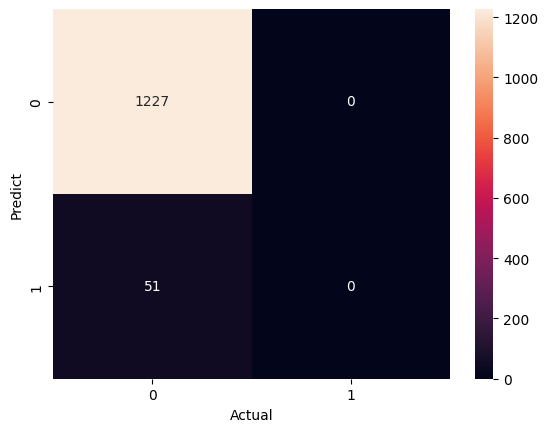

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_predict),annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.show()

### Lets go with KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 10, weights= 'uniform')

In [13]:
knn_param=({
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_neighbors':[4,5,7,8,9,10]
})

In [14]:
knn_gdr=GridSearchCV(knn,param_grid=knn_param,cv=10)

In [30]:
knn_gdr.fit(X_train,y_traain)

ValueError: 
All the 480 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Female'

--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Male'


In [ ]:
knn_gdr.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
knn.fit(X_train,y_traain)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn_train_acc=knn.score(X_train,y_traain)
knn_train_acc

0.9491127348643006

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
knn_testing_acc=accuracy_score(knn_pred,y_test)
knn_testing_acc

0.960093896713615

In [ ]:
result=result.append({'model':'knn','actual':knn_train_acc,'predict':knn_testing_acc},ignore_index=True)


<ipython-input-484-340c0158f756>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'knn','actual':knn_train_acc,'predict':knn_testing_acc},ignore_index=True)


,model,actual,predict
0,Logistic regression,0.94833,0.960094
1,DecisionTree,0.948591,0.960094
2,RandomForest,0.94833,0.960094
3,knn,0.949113,0.960094
4,knn,0.949113,0.960094


In [ ]:
result.drop(4,inplace=True)

In [ ]:
result

,model,actual,predict
0,Logistic regression,0.94833,0.960094
1,DecisionTree,0.948591,0.960094
2,RandomForest,0.94833,0.960094
3,knn,0.949113,0.960094


### SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc_param=({
    'kernel':['linear','poly','rbf','sigmoid', 'precomputed'],

    'gamma':['scale', 'auto']
})

In [ ]:
svc.fit(X_train,y_traain)

SVC()

In [ ]:
svc_train_acc=svc.score(X_train,y_traain)
svc_train_acc

0.9483298538622129

In [ ]:
svc_pred=svc.predict(X_test)

In [ ]:
svc_test_acc=accuracy_score(svc_pred,y_test)
svc_test_acc

0.960093896713615

In [ ]:
result=result.append({'model':'SVC','actual':svc_train_acc,'predict':svc_test_acc},ignore_index=True)

<ipython-input-505-0d1ace823164>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'SVC','actual':svc_train_acc,'predict':svc_test_acc},ignore_index=True)


In [ ]:
result

,model,actual,predict
0,Logistic regression,0.94833,0.960094
1,DecisionTree,0.948591,0.960094
2,RandomForest,0.94833,0.960094
3,knn,0.949113,0.960094
4,SVC,0.94833,0.960094


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
num_cols=['avg_glucose_level','bmi']
cat_cols=['ever_married','work_type','Residence_type','smoking_status','gender']

In [ ]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

In [ ]:
cols_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('labelEncoder',LabelEncoder())
])

In [ ]:
processing=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cols_pipeline,cat_cols)
])

In [ ]:
processing

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['avg_glucose_level', 'bmi']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('labelEncoder',
                                                  LabelEncoder())]),
                                 ['ever_married', 'work_type', 'Residence_type',
                                  'smoking_status'])])

In [ ]:
df_copy.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,0,2.706375,1.002210,2,1
1,0,61,0,0,1,3,0,2.121559,-0.024117,2,1
2,1,80,0,1,1,3,0,-0.005028,0.469559,2,1
3,0,49,0,0,1,3,0,1.437358,0.716397,2,1
4,0,79,1,0,1,3,0,1.501184,-0.634716,2,1


In [ ]:
df1=pd.read_csv('/content/drive/My Drive/Colab_Notebooks/MachineLearning/StrokeDetection/healthcare-dataset-stroke-data.csv')

In [ ]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df1.drop(columns=['id'],axis=1,inplace=True)

In [ ]:
df1.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [1]:
knn.predict([0,28,0,0,0,3,0,1.67666,1.45,0])

NameError: name 'knn' is not defined

In [ ]:
df1['bmi'].isnull().sum()

201

In [ ]:
df1.fillna(df1['bmi'].mode()[0],inplace=True)

In [ ]:
df1.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1


In [ ]:
X1=df1.drop(columns=['stroke'])

In [ ]:
X1.shape

(5110, 10)

In [ ]:
y1=df1['stroke']
y1.shape

(5110,)

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=0)

In [ ]:
X1_train=processing.fit_transform(X1_train)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given